# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [125]:
# Libraries
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
print('shape X:', X.shape)
print('shape y:', y.shape) 

shape X: (70000, 784)
shape y: (70000,)


#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [4]:
# your code here
X[36000] 

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

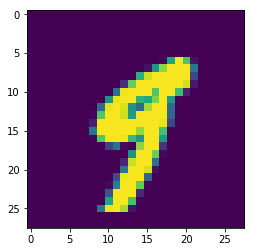

In [5]:
# your code here
X_reshape = X[36000].reshape((28,28))
plt.imshow(X_reshape);

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [6]:
# your code here
y[36000] 

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [7]:
# your code here 
X_train=X[:60000] 
y_train=y[:60000] 
X_test=X[60000:] 
y_test=y[60000:] 

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [8]:
# your code here
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5', 1, 0) 

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [10]:
# your code here
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X_train,y5_train) 

/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 36000th digit we picked before?

In [14]:
# your code here
predictions = model1.predict(X_train) #because this index is in train set
predictions[36000]

0

In [ ]:
# your comments here
# yes it is correct: the output is 0 and 36000 is not a 5 

#### The 35th value is a 5. Check if it was correctly predicted.

In [16]:
# your code here
predictions[35] 

1

In [ ]:
# your comments here
# yes it is correct: the output is 5 and 35 is a 5 

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [41]:
# Libraries
from sklearn.base import BaseEstimator

In [72]:
# Dumb classifier

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0] 

never_5_clf = Never5Classifier() 

#### Now lets fit and predict on the testing set using our dumb classifier.

In [83]:
# your code here
never_5_clf.fit(X_train)
predictions_never5 = never_5_clf.predict(X_train) 

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [124]:
# your code here
predictions_log = model1.predict(X_test)
print('log regression model')
print('\nconfusion matrix\n', confusion_matrix(y5_test, predictions_log))
print('precision score:', precision_score(y5_test, predictions_log))
print('recall score:', recall_score(y5_test, predictions_log))
print('f1 score:', f1_score(y5_test, predictions_log))

print('\n\n never 5 model')
print('\nconfusion matrix:\n', confusion_matrix(y5_train, predictions_never5))
print('precision score:', precision_score(y5_train, predictions_never5))
print('recall score:', recall_score(y5_train, predictions_never5))
print('f1 score:', f1_score(y5_train, predictions_never5))

log regression model

confusion matrix
 [[9026   82]
 [ 145  747]]
precision score: 0.9010856453558505
recall score: 0.8374439461883408
f1 score: 0.8680999418942476


 never 5 model

confusion matrix:
 [[54579     0]
 [ 5421     0]]
precision score: 0.0
recall score: 0.0
f1 score: 0.0


/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here
# log regression model works best because all scores are not 0 there
# the never 5 model does not work as a predictor 

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

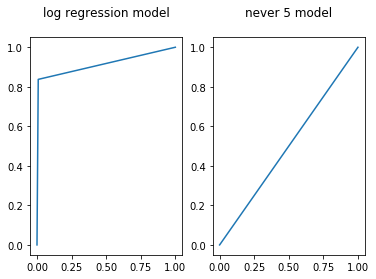

In [122]:
# your code here

# log regression model
fpr, tpr, thresholds = roc_curve(y5_test, predictions_log)  
auc = roc_auc_score(y5_test, predictions_log)

# never 5 model
fpr2, tpr2, thresholds2 = roc_curve(y5_train, predictions_never5)  
auc2 = roc_auc_score(y5_train, predictions_never5)

# plot curve
fig, ax = plt.subplots(1, 2);
ax[0].plot(fpr,tpr);
ax[0].set_title('log regression model\n');
ax[1].plot(fpr2,tpr2);
ax[1].set_title('never 5 model\n'); 

#### Now find the roc_auc_score for each. 

In [119]:
# your code here
print('\nAUC for log regression model =', auc)
print('AUC for never 5 model =',auc2)


AUC for log regression model = 0.9142204359839378
AUC for never 5 model = 0.5


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here
# never 5 model give a AUC score of 0.5 which means that the model is guessing the output and is a very bad predictor
# log regression model give a score of 0.91 which means that the model is a quite good predictor
    # the closer to 1, the more correct true positives and true negatives 